In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [ ]:
df = pd.read_csv('/content/eCommerce_Customer_support_data.csv')
df.head()


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
df.isnull().sum()

# Drop unnecessary columns
df.drop(columns=['Unique id', 'Order_id'], inplace=True)

# Fill or drop missing values
df['Customer Remarks'].fillna('No Remarks', inplace=True)
df = df.dropna()


<ipython-input-4-00705d929457>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Remarks'].fillna('No Remarks', inplace=True)


In [ ]:
datetime_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], dayfirst=True)


<ipython-input-6-ca4073a28450>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], dayfirst=True)
<ipython-input-6-ca4073a28450>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], dayfirst=True)
<ipython-input-6-ca4073a28450>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
df['Response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60
df['Delivery_time_hours'] = (df['Issue_reported at'] - df['order_date_time']).dt.total_seconds() / 3600


<ipython-input-7-2a539dd0cd08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60
<ipython-input-7-2a539dd0cd08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delivery_time_hours'] = (df['Issue_reported at'] - df['order_date_time']).dt.total_seconds() / 3600


In [ ]:
df.drop(columns=datetime_cols, inplace=True)


<ipython-input-8-31bc42c2c9f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=datetime_cols, inplace=True)


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


<ipython-input-9-ed0c737c49b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-9-ed0c737c49b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-9-ed0c737c49b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
X = df.drop(columns=['CSAT Score'])
y = df['CSAT Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output (CSAT Score)
])

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 19.7452 - val_loss: 18.9754
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 17.0073 - val_loss: 16.7493
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.8418 - val_loss: 14.5021
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.0952 - val_loss: 12.2323
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.9520 - val_loss: 10.0005
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.6246 - val_loss: 7.8571
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.7400 - val_loss: 5.9689
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.9103 - val_loss: 4.4759
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.8477 - val_loss: 3.4539
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.0920 - val_loss: 2.9795
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.6319 - val_loss: 2.9320
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.66

In [ ]:
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Mean Squared Error: 2.709885597229004
R^2 Score: -0.6598049402236938


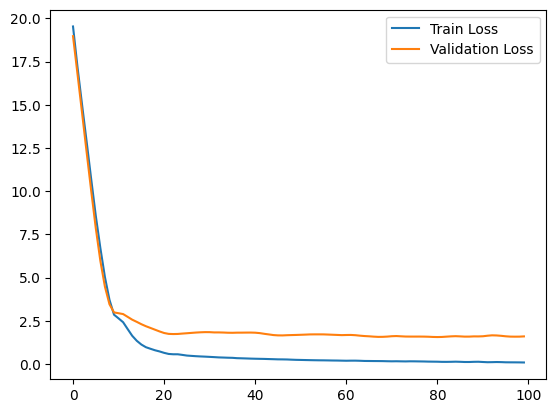

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


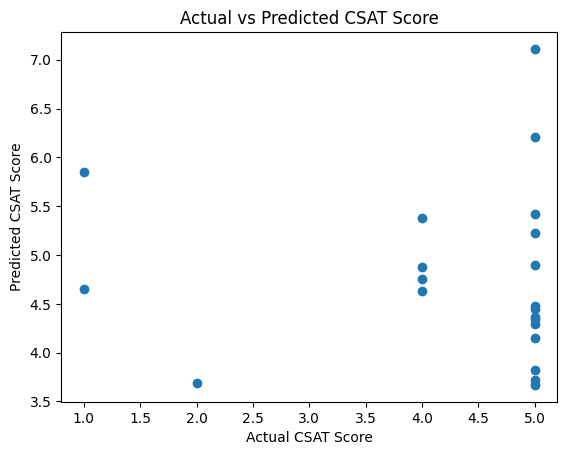

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CSAT Score")
plt.ylabel("Predicted CSAT Score")
plt.title("Actual vs Predicted CSAT Score")
plt.show()


In [ ]:
model.save('deepcsat_model.h5')


In [ ]:
new_model = keras.models.load_model('deepcsat_model.h5')
new_predictions = new_model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
